<a href="https://colab.research.google.com/github/snufka/PythonProject/blob/main/Tasks_divided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

#Task 1-------------------------------------------------------------------------
#url= input ("Enter wiki url :")
#for easy testing
url= 'https://en.wikipedia.org/wiki/Wolfgang_Amadeus_Mozart'

def scraping_webpage(url): #web scraping function

    page=requests.get(url)
#getting the text and parsing it
    soup = BeautifulSoup(page.text, 'html.parser')
#The Wiki page Text
    body_text = soup.find(class_='mw-body')
    text = soup.get_text()
    return text 

my_fun = scraping_webpage(url)
print(my_fun)






Wolfgang Amadeus Mozart - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"35bc58ed-bcde-47bd-95c8-7688e1b24b0a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Wolfgang_Amadeus_Mozart","wgTitle":"Wolfgang Amadeus Mozart","wgCurRevisionId":1043412287,"wgRevisionId":1043412287,"wgArticleId":33163,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with hAudio microformats","Works with IMSLP links","Articles with International Music Score Library Project links","CS1 maint: multiple names: authors list","Wikipedia articles needing page number citations from July 2020","Articles with short

In [19]:
#Task 2-------------------------------------------------------------------------
def lang_in_url():
    split = url.split(".")

#Checking Language by subDomain;
    if split[0].find("en") == -1:
        print("*********Based on the URL, this page is in German**************")
  # elif (split[0].includes("en"))
   #     print("it's not english nor German, to find out more please visit https://en.wikipedia.org/wiki/List_of_Wikipedias#List")
    else: 
        print("*********Based on the URL, this page is in English*****************")
  
url_lang=lang_in_url()

*********Based on the URL, this page is in English*****************


   Letter  Frequency Input 1
0       a               5055
1       b                904
2       c               2200
3       d               1979
4       e               6349
..    ...                ...
58      ś                  1
59      š                  4
60      ů                  1
61      ų                  1
62      ž                  2

[63 rows x 2 columns]


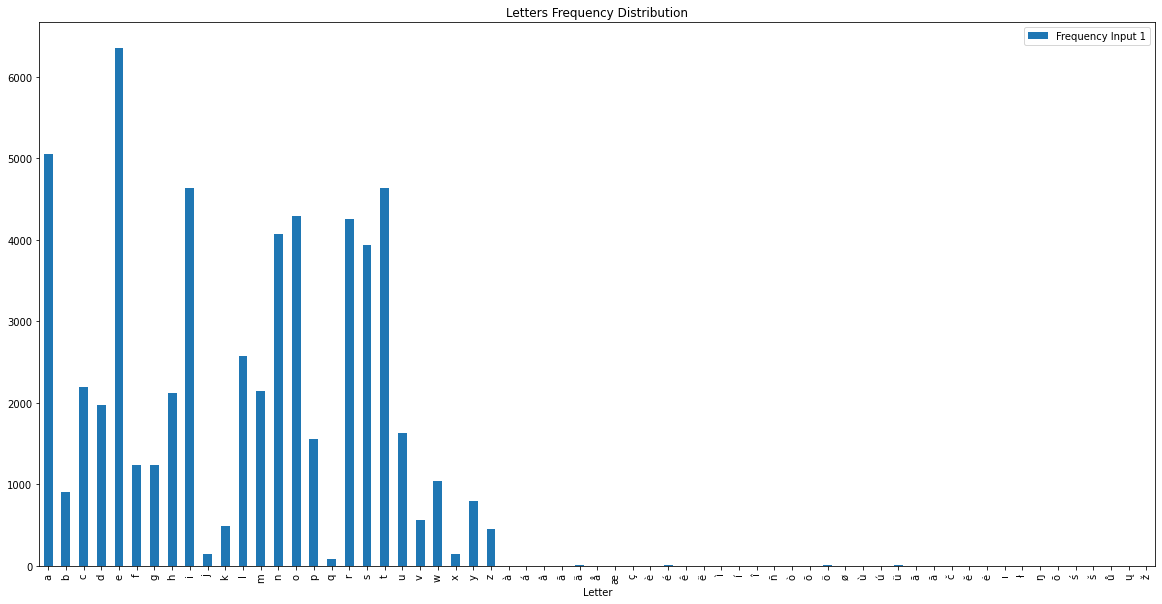

In [28]:
#TASK 3-------------------------------------------------------------------------
#list of only the letters, including german letters
def letters_frequency(my_fun):
     x = re.findall("[A-Za-zÀ-ȕ]", my_fun)

#turn it back to str to count frequency
     clean_str= ''.join([str(elem) for elem in x])

#frequency count
     freq = {} 
     for item in clean_str.lower(): 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1

#sorting dictinory alphabetically
     sortedDict = dict( sorted(freq.items(), key=lambda x: x[0].lower()) )
     return sortedDict

lff=letters_frequency(my_fun)

#the frequency table
df1=pd.DataFrame(lff.items(),columns=['Letter', 'Frequency Input 1'])
print(df1)

#The chart
df_reset=df1.set_index('Letter')
df_reset.plot.bar(figsize=(20,10),title='Letters Frequency Distribution')

   Letter  Frequency Input 1  Frequency Input 2
0       a             5055.0             8659.0
1       b              904.0             3001.0
2       c             2200.0             3405.0
3       d             1979.0             6236.0
4       e             6349.0            20856.0
..    ...                ...                ...
63      ß                NaN              154.0
64      ó                NaN                2.0
65      ć                NaN                1.0
66      ğ                NaN                2.0
67      ņ                NaN                1.0

[68 rows x 3 columns]
None


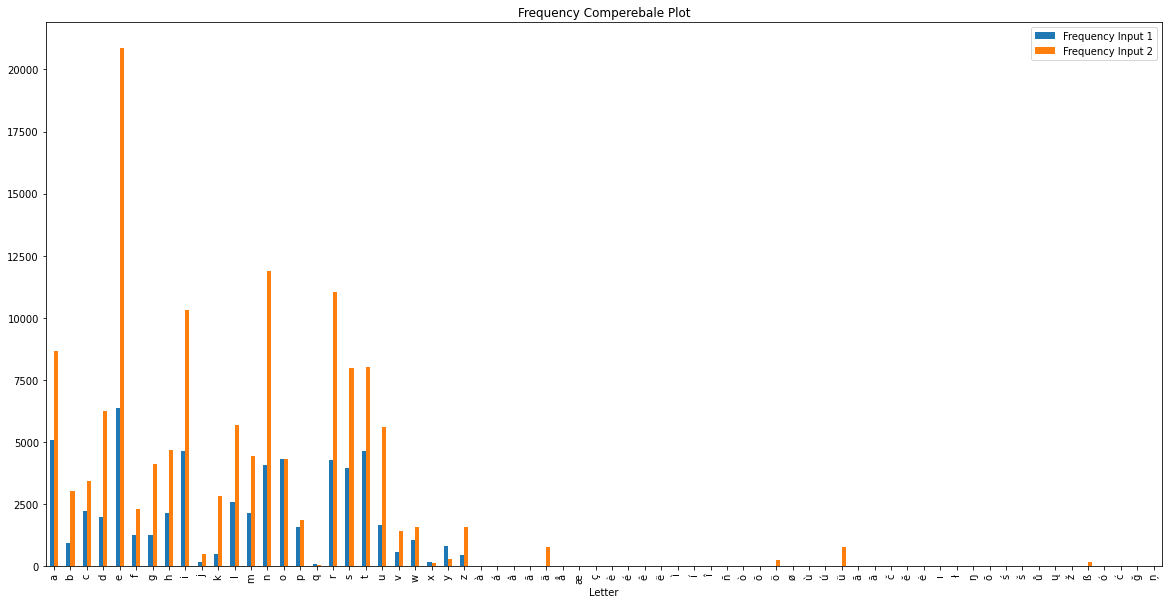

In [33]:
#Task 4 Plooting----------------------------------------------------------

url_2='https://de.wikipedia.org/wiki/Angela_Merkel'
page_2=requests.get(url_2)
secondtext=scraping_webpage(url_2)
#print(secondtext)
lff_2=letters_frequency(secondtext)
#print(lff_2)
df2=pd.DataFrame(lff_2.items(),columns=['Letter', 'Frequency Input 2'])
#print(df2)
def data_merging_chart():
    merged_table=pd.merge(df1, df2, on='Letter', how='outer')
    print(merged_table)
    df_reset=merged_table.set_index('Letter')
    df_reset.plot.bar(figsize=(20,10), title='Frequency Comperebale Plot')

merged_chart=data_merging_chart()
print(merged_chart)


In [34]:
# Task 5 & 6-----------------------------------------------------------------------
def is_the_text_in_german():
#count of letters sum
   values_char = lff.values()
   total_char= sum(values_char)
#print("Total number of letters in the text: {}".format(total_char))

#Counting German Letters and counting the percentage of the letter in the text
   germna_letters= ['ä', 'ö', 'ü', 'ß']
   german_char_dict = {k:lff[k] for k in germna_letters if k in lff}

   values_german_char = german_char_dict.values()
   total_german_char= sum(values_german_char)

   print("Total number of German letter in the text: {}".format(total_german_char))

# Calculation of the % of the German latters of the text
   percentage_of_german_char= (total_german_char/total_char)*100

   print("percentage of greman letter in the text: {}".format(percentage_of_german_char))

#Probablity that the text is in German----------
   if percentage_of_german_char >= 0.465:
      print( "We are 100% sure that this text is in German! The frequency of special German characters is 0.465% or higher!")

   elif percentage_of_german_char < 0.465 and percentage_of_german_char >= 0.348:
    print("The chance that this text is in German is very high 100% - 75%! The frequency of special German characters is {}%".format(percentage_of_german_char))

   elif percentage_of_german_char < 0.348 and percentage_of_german_char >= 0.2325:
    print("We are 75% - 50% sure that this text is in German! The frequency of special German characters is {}%".format(percentage_of_german_char))

   elif percentage_of_german_char < 0.2325 and percentage_of_german_char >= 0.116:
    print("We are 50% - 25% sure that this text is in German! The frequency of special German characters is {}%".format(percentage_of_german_char))

   else: 
    print( "Not German! There is less than 25% that this text is in German! The frequency of special German characters is {}%".format(percentage_of_german_char))

text_lang= is_the_text_in_german()

Total number of German letter in the text: 29
percentage of greman letter in the text: 0.04944670838377466
Not German! There is less than 25% that this text is in German! The frequency of special German characters is 0.04944670838377466%


In [ ]:
#Testing
